
## Identifying Surfer's Experience Group Based on Performed Manoeuvres

**Guilherme Branco Loureiro** - August, 2019 - Florianópolis Brazil - Capstone Project

***
### Import modules

In [49]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [10]:
df = pd.read_csv("df_manoeuvres_experience.csv")
df = df.drop(df.columns[0], axis=1)
df.head()

,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_rasgada,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,surfer_experience
0,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Consigo normalmente,Consigo normalmente,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Avançado
1,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Aprendiz
2,Sempre consigo,Consigo normalmente,Sempre consigo,Consigo normalmente,As vezes eu consigo,Consigo normalmente,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Avançado
3,Sempre consigo,Consigo normalmente,Não sei,Consigo normalmente,As vezes eu consigo,As vezes eu consigo,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Avançado
4,Sempre consigo,Consigo normalmente,Consigo normalmente,Sempre consigo,Consigo normalmente,Consigo normalmente,Sempre consigo,Sempre consigo,As vezes eu consigo,Ainda não consigo,Avançado


As noticed, the answers are in portuguese, so we have to translate to english.

In [11]:
translation_dict = {
    'Ainda não consigo': 'Not yet',
    'As vezes eu consigo': 'Sometimes',
    'Consigo normalmente': 'Usually',
    'Sempre consigo': 'Always',
    'Não sei': "I don't know",
}
translation_dict

{'Ainda não consigo': 'Not yet',
 'As vezes eu consigo': 'Sometimes',
 'Consigo normalmente': 'Usually',
 'Sempre consigo': 'Always',
 'Não sei': "I don't know"}

In [13]:
df.replace(inplace=True, to_replace=translation_dict)
df.head()

,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_rasgada,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,surfer_experience
0,Always,Always,Always,Always,Always,Usually,Usually,Usually,Usually,Sometimes,Avançado
1,Usually,Sometimes,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Aprendiz
2,Always,Usually,Always,Usually,Sometimes,Usually,Usually,Usually,Sometimes,Not yet,Avançado
3,Always,Usually,I don't know,Usually,Sometimes,Sometimes,Usually,Usually,Sometimes,Not yet,Avançado
4,Always,Usually,Usually,Always,Usually,Usually,Always,Always,Sometimes,Not yet,Avançado


***
### Explore dataset Features

In [14]:
df.columns;

**Dataset features:**
- manoeuvres_01_paddling
- manoeuvres_02_drop
- manoeuvres_03_straight_ahead
- manoeuvres_04_wall_riding
- manoeuvres_05_floater
- manoeuvres_06_cut_back
- manoeuvres_07_rasgada
- manoeuvres_08_off_the_lip
- manoeuvres_09_tube
- manoeuvres_10_air
- surfer_experience

The first 10 features are **inputs**, and the last one is an **output** to be further used as benchmark.

### Rename features
The names of the features are to long, so we'll shorten them by remove the 'manoeuvres_' prefix.

In [40]:
new_columns = []
for col in df.columns:
    if 'manoeuvre' in col:
        new_columns.append(col[11:])
    else:
        new_columns.append(col)

df.columns = new_columns
[print(col) for col in df.columns]

01_paddling
02_drop
03_straight_ahead
04_wall_riding
05_floater
06_cut_back
07_rasgada
08_off_the_lip
09_tube
10_air
surfer_experience


[None, None, None, None, None, None, None, None, None, None, None]

In [41]:
# Prepare input features
df_x = df.drop(['surfer_experience'], axis=1)
df_x.head()

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air
0,Always,Always,Always,Always,Always,Usually,Usually,Usually,Usually,Sometimes
1,Usually,Sometimes,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet
2,Always,Usually,Always,Usually,Sometimes,Usually,Usually,Usually,Sometimes,Not yet
3,Always,Usually,I don't know,Usually,Sometimes,Sometimes,Usually,Usually,Sometimes,Not yet
4,Always,Usually,Usually,Always,Usually,Usually,Always,Always,Sometimes,Not yet


In [42]:
# Prepare output feature
# We'll hide this feature until further benchmarking
df_y = df['surfer_experience']
df_y.head()

0    Avançado
1    Aprendiz
2    Avançado
3    Avançado
4    Avançado
Name: surfer_experience, dtype: object

### Replace portuguese with numerical data

As seen in `df_x`, the answers are in portuguese and express the frequency of execution of each manoeuvre.
Hence, we need to scale them from `0` to `1`, so they can be quantifiable.
For so, we'll use a replacement dictionary, as follows.

In [43]:
replacement_dict = {
    'Not yet': 0,
    'Sometimes': 0.33,
    'Usually': 0.66,
    'Always': 1,
    "I don't know": np.nan,
}
replacement_dict

{'Not yet': 0,
 'Sometimes': 0.33,
 'Usually': 0.66,
 'Always': 1,
 "I don't know": nan}

In [44]:
df_x.replace(inplace=True, to_replace=replacement_dict)
df_x.head()

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air
0,1.00,1.00,1.00,1.00,1.00,0.66,0.66,0.66,0.66,0.33
1,0.66,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.66,1.00,0.66,0.33,0.66,0.66,0.66,0.33,0.00
3,1.00,0.66,NaN,0.66,0.33,0.33,0.66,0.66,0.33,0.00
4,1.00,0.66,0.66,1.00,0.66,0.66,1.00,1.00,0.33,0.00


### Drop Nan
TODO Implementing

In [45]:
df.shape[0]
print(f'The dataframe has {df.shape[0]} samples and {df.shape[1]} features')

The dataframe has 165 samples and 11 features


Now that we have a numerical dataset with managed NaN : )
Let's get three samples at random

### Get correlation among features

In [48]:
df_corr = df_x.corr().round(2)
df_corr

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air
01_paddling,1.00,0.62,0.47,0.56,0.33,0.38,0.44,0.37,0.32,0.11
02_drop,0.62,1.00,0.63,0.75,0.57,0.58,0.63,0.59,0.46,0.28
03_straight_ahead,0.47,0.63,1.00,0.62,0.36,0.41,0.38,0.39,0.27,0.14
04_wall_riding,0.56,0.75,0.62,1.00,0.62,0.63,0.64,0.66,0.48,0.28
05_floater,0.33,0.57,0.36,0.62,1.00,0.80,0.82,0.81,0.79,0.58
06_cut_back,0.38,0.58,0.41,0.63,0.80,1.00,0.85,0.77,0.70,0.51
07_rasgada,0.44,0.63,0.38,0.64,0.82,0.85,1.00,0.84,0.71,0.49
08_off_the_lip,0.37,0.59,0.39,0.66,0.81,0.77,0.84,1.00,0.71,0.51
09_tube,0.32,0.46,0.27,0.48,0.79,0.70,0.71,0.71,1.00,0.63
10_air,0.11,0.28,0.14,0.28,0.58,0.51,0.49,0.51,0.63,1.00


### Plot Heatmap
Numbers are good, but colors are better!

> "The stronger the red, the stronger the correlation"

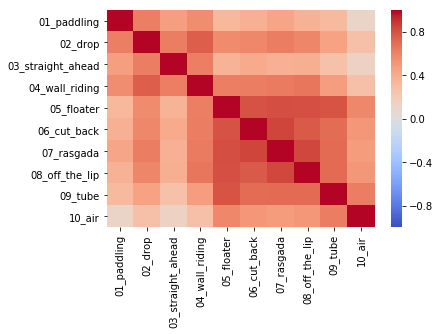

In [55]:
ax = sns.heatmap(df_corr, cmap='coolwarm', vmin=-1, vmax=1)

### Get samples

In [56]:
for i in [1, 2, 3]:
    id = random.randrange(165)
    print(f'Sample {i}:\n{df.iloc[id]}\n')

Sample 1:
01_paddling             Always
02_drop                 Always
03_straight_ahead       Always
04_wall_riding          Always
05_floater              Always
06_cut_back             Always
07_rasgada              Always
08_off_the_lip          Always
09_tube                 Always
10_air               Sometimes
surfer_experience     Avançado
Name: 42, dtype: object

Sample 2:
01_paddling             Always
02_drop                 Always
03_straight_ahead       Always
04_wall_riding          Always
05_floater             Usually
06_cut_back          Sometimes
07_rasgada             Usually
08_off_the_lip         Usually
09_tube              Sometimes
10_air                 Not yet
surfer_experience     Avançado
Name: 77, dtype: object

Sample 3:
01_paddling                 Always
02_drop                  Sometimes
03_straight_ahead           Always
04_wall_riding              Always
05_floater               Sometimes
06_cut_back              Sometimes
07_rasgada               Som

### Reducing dimensionality

In [ ]:
# TODO Implement PCA

In [ ]:
# TODO Implement t-SNE

In [ ]:
# TODO Compare PCA vs. t-SNE

A good explanation and comparison of PCA and t-SNE are presented [here.](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b).
One of the main differences are:
> "t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one." By *Luuk Derksen*




***
## Tuning the model
### Exploring the number of clusters

In [ ]:
# TODO implement the Elbow method

### Benchmarking
#### GMM vs. K-means

In [ ]:
# TODO 

In [ ]:
# TODO implement the Silhouette Coefficient 